In [73]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Importing the Data from the dataset 
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# explore the data

In [74]:
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


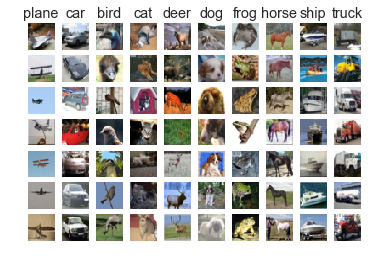

In [75]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

as we are going to perform a cross-validation on the tranning set 
lets make shufful it so that the data gets equally distributed and none of the data digits escape any of the 
validation set or the traning set, as some algorithm only performs well on the equally distributed data. 

In [76]:
#shuffle the training data
import numpy as np
shuffle_index = np.random.permutation(50000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# preprocessing the data

In [77]:
from sklearn.preprocessing import StandardScaler  
x_train =np.reshape(x_train, (50000,3072))
y_train=np.reshape(y_train, (50000,))
x_test =np.reshape(x_test, (10000,3072))
y_test =np.reshape(y_test, (10000,))
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Training the Model with the KNN classifier 

In [82]:
from sklearn.datasets.mldata import fetch_mldata
from sklearn.linear_model import KNeighborsClassifier
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

ML_model = KNeighborsClassifier(random_state= 43)
ML_model.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=43,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [83]:
# calculating training accuracy
score = cross_val_score(ML_model, x_train, y_train, cv= 3)
training_accuracy = score.mean() * 100;
print('Traning Accuracy is = ' + str(training_accuracy) + '%')


Traning Accuracy is = 25.908192911237677%


In [84]:
# Test Error calculation 
Test_pred_y = ML_model.predict(x_test);
test_accuracy = sum(Test_pred_y == y_test); 
print('Generalization Accuracy = ' + str(test_accuracy/len(Test_pred_y) * 100)+ '%');

Generalization Accuracy = 28.810000000000002%


In [89]:
#Confusion Matrix 
conf_mat = confusion_matrix(y_test, Test_pred_y)
print('---------------Confusion Matrix---------------')
print(conf_mat)

---------------Confusion Matrix---------------
[[494  94  43  18  58  29  18  37 121  88]
 [133 425  18  32  38  33  33  52 114 122]
 [122 166 207  41 153  45 100  74  47  45]
 [ 76 223 108 104 131  75 124  33  70  56]
 [ 54 189 131  37 283  42 105  91  35  33]
 [ 57 173 103  94 145 102  86  77 102  61]
 [ 67 211  83  62 108  36 317  48  38  30]
 [ 99 157  91  47 145  36  55 249  38  83]
 [231 115  15  29  25  24  15  40 386 120]
 [149 154  29  24  49  31  61  74 115 314]]


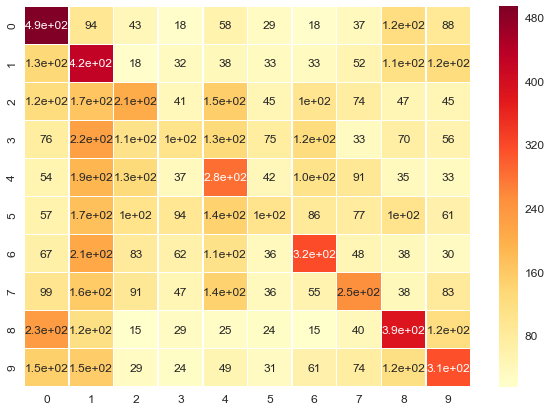

In [90]:
#visualisation of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlOrRd')# font size
plt.show()
